# PCA on subset

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
india_pca = pd.read_csv('./data/all_india_full.csv')
subset_pca = pd.DataFrame(columns=india_pca.columns)
for i, row in india_pca.iterrows():
    if row['language']!='Austroasiatic' and row['people']!='Tribal':
        subset_pca = subset_pca.append(row)

In [55]:
subset_pca = subset_pca.reset_index()
codings = subset_pca

In [56]:
features = ['cv_'+str(i+1) for i in range(37)]
# Separating out the features
x = codings.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['region']].values

In [57]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Vocal Complexity', 'Instrumentation'])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

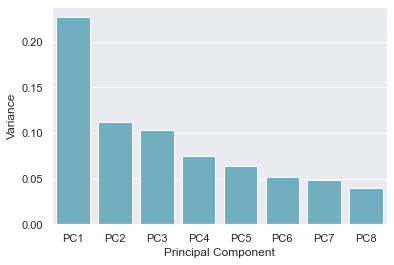

In [58]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
plt.figure(figsize=(6,4))
df = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8']}) 
sns.set(font='Arial')
sns.barplot(x='Principal Component',y="Variance", 
           data=df, color="c")

In [59]:
codings.head()

,index,canto_coding_id,region,division,subregion,area_kingdom,culture,language,people,lat,...,cv_28,cv_29,cv_30,cv_31,cv_32,cv_33,cv_34,cv_35,cv_36,cv_37
0,45,756,North,India,C India/ Central Tribal Area,Malwa,C Indian Folk,Indo-European,Non-Tribal,22.97,...,0.38,1.00,0.08,1.00,0.31,0.08,0.08,0.54,0.54,0.77
1,95,9895,North,India,Gangetic Plain,Uttar Pradesh,Uttar Pradesh,Indo-European,Non-Tribal,26.84,...,0.69,0.54,0.77,0.54,0.42,0.46,0.31,0.31,0.31,0.31
2,96,9896,North,India,Gangetic Plain,Uttar Pradesh,Uttar Pradesh,Indo-European,Non-Tribal,25.26,...,0.69,0.54,0.54,1.00,0.77,0.46,0.31,0.54,0.77,0.54
3,97,9899,North,India,Gangetic Plain,Uttar Pradesh,Uttar Pradesh,Indo-European,Non-Tribal,26.84,...,0.69,0.54,0.54,1.00,0.77,0.46,0.31,0.54,0.77,0.31
4,98,9914,North,India,Gangetic Plain,Uttar Pradesh,Uttar Pradesh,Indo-European,Non-Tribal,26.44,...,0.38,0.08,0.31,1.00,0.77,0.35,0.42,0.42,0.54,0.31


In [60]:
import matplotlib.pyplot as plt

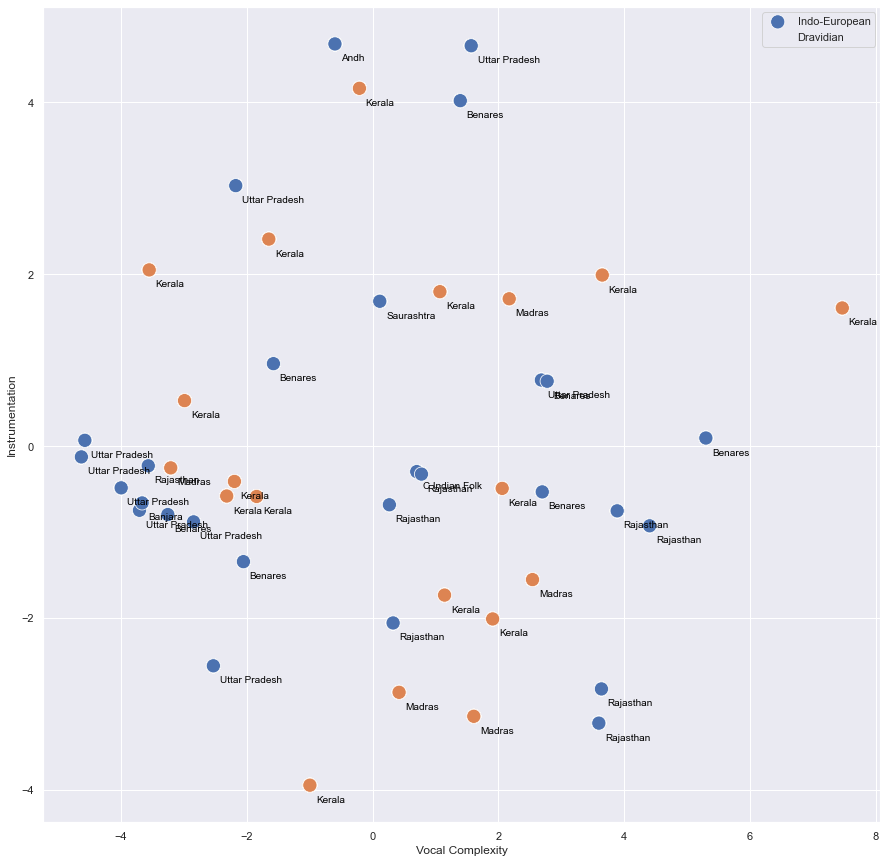

In [61]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['language']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['language'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Vocal Complexity']
               , finalDf.loc[indicesToKeep, 'Instrumentation'], hue=targets, s=200)

p1.set(xlabel='Vocal Complexity', ylabel='Instrumentation')

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Vocal Complexity']+0.1, finalDf.loc[line, 'Instrumentation']-0.2, codings.loc[line, 'culture'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle._size = [20.0]
                                    
plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/subset_pca.png")

In [21]:
pca.explained_variance_

array([8.56953178, 4.22720946, 3.88430132, 2.83625098, 2.40151887,
       1.9675631 , 1.8129038 , 1.51031548])

In [22]:
pca.explained_variance_ratio_

array([0.22681154, 0.11188241, 0.10280659, 0.07506763, 0.06356149,
       0.05207589, 0.04798249, 0.03997383])

# Variable Loadings

In [25]:
line_metadata = pd.read_csv('./line_metadata.csv')
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=line_metadata['var_title'])
loadings.to_csv('./output/subset_loadings.csv')

# PCA

In [72]:
india_pca = pd.read_csv('./data/all_india_full.csv')
codings = india_pca

In [91]:
india_pca.head()

,canto_coding_id,region,division,subregion,area_kingdom,culture,language,people,lat,lng,...,cv_28,cv_29,cv_30,cv_31,cv_32,cv_33,cv_34,cv_35,cv_36,cv_37
0,3772,North,India,C India/ Central Tribal Area,Chhattisgarh,Dhurwa Gond,Dravidian,Tribal,18.75,81.78,...,0.38,1.00,0.54,1.00,0.31,0.77,0.54,0.54,0.31,0.54
1,3773,North,India,C India/ Central Tribal Area,Chhattisgarh,Dhurwa Gond,Dravidian,Tribal,18.75,81.78,...,0.69,1.00,0.54,0.54,0.77,0.62,0.77,0.77,0.77,0.77
2,3774,North,India,C India/ Central Tribal Area,Chhattisgarh,Dhurwa Gond,Dravidian,Tribal,18.75,81.78,...,0.38,0.54,0.77,0.54,0.54,0.62,0.31,0.31,0.54,0.54
3,3775,North,India,C India/ Central Tribal Area,Chhattisgarh,Dhurwa Gond,Dravidian,Tribal,18.75,81.78,...,0.38,0.54,0.77,1.00,0.42,0.77,1.00,1.00,0.54,0.54
4,3776,North,India,C India/ Central Tribal Area,Chhattisgarh,Dhurwa Gond,Dravidian,Tribal,18.75,81.78,...,0.69,1.00,0.54,1.00,0.42,0.77,1.00,1.00,0.54,0.54


In [95]:
x = codings.loc[:, features].values
x = StandardScaler().fit_transform(x)
y = codings.loc[:,['language']].values

In [96]:
x = np.nan_to_num(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Melodic Complexity', 'Vocal Style'])

finalDf = pd.concat([principalDf, codings['language']], axis = 1)

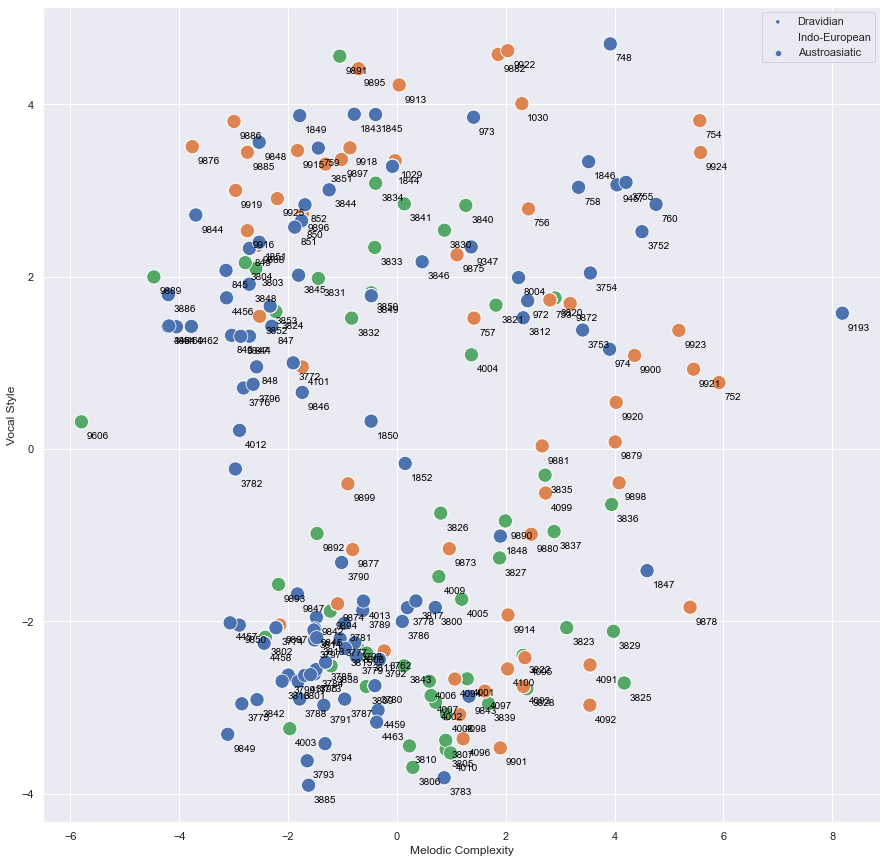

In [104]:
colors = cm.get_cmap('viridis', 9232)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
targets = codings['language']
for target, color in zip(targets,colors.colors):
    indicesToKeep = finalDf['language'] == target
    p1 = sns.scatterplot(finalDf.loc[indicesToKeep, 'Melodic Complexity']
               , finalDf.loc[indicesToKeep, 'Vocal Style'], hue=targets, s=200)

# If you want to add annotations uncomment the following lines
for line in range(0,codings.shape[0]):
     p1.text(finalDf.loc[line, 'Melodic Complexity']+0.1, finalDf.loc[line, 'Vocal Style']-0.2, codings.loc[line, 'canto_coding_id'], horizontalalignment='left', size='small', color='black', weight='light')
 

lgnd = ax.legend(targets.unique(), loc="upper right")
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

plt.rcParams.update({'font.size': 12})
plt.savefig("./figs/full_pca_CID.png")

## Explained Variance

In [100]:
pca.explained_variance_

array([6.30524733, 6.19551102])

In [101]:
pca.explained_variance_ratio_

array([0.16961099, 0.16665908])

## Variable Loadings

In [102]:
# subset_metadata = []
line_metadata = pd.read_csv('./line_metadata.csv')
# for i, row in line_metadata.iterrows():
#     linenum = 'cv_'+str(row['Unnamed: 0'])
#     if linenum not in drop_features:
#         subset_metadata.append(row['var_title'])

In [103]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=line_metadata['var_title'])
loadings.to_csv('./output/loadings_full.csv')

In [ ]:
drop_features = ['cv_1','cv_5','cv_6','cv_12','cv_22','cv_2','cv_3','cv_8','cv_9','cv_13','cv_14','cv_27']
subset = []
numbers = []
for i in range(1,38):
    feature = 'cv_'+str(i)
    if feature not in drop_features:
        subset.append(feature)
        numbers.append(i)